# 0. Loading data

In [1]:
import pandas as pd

## 0.1. Firstly we load the data

In [2]:
df = pd.read_csv("/home/juls/Escritorio/T2.csv")
list(df)
print(df.shape)

/home/juls/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(78646, 245)


# 1. Filtering

## 1.1. Filter rows

The first thing we need to do is to convert strings to datetime since we'll filter rows by date.

In [10]:
df['TimeStemp'] = pd.to_datetime(df['TimeStemp'])

Then we can apply a filter by date.

In [11]:
df28 = df[(df['TimeStemp'] > '2016-04-25 00:00:00') & (df['TimeStemp'] <= '2016-04-30 23:59:59') ]

print(df28.shape)

(3478, 245)


## 1.2. Filter columns

We'll get only the MEAN columns

In [12]:
df28mean = df28[[c for c in df if c.endswith('MEAN')]]
list(df28mean)

['AccelerometerStat_x_MEAN',
 'AccelerometerStat_y_MEAN',
 'AccelerometerStat_z_MEAN',
 'GyroscopeStat_x_MEAN',
 'GyroscopeStat_y_MEAN',
 'GyroscopeStat_z_MEAN',
 'MagneticField_x_MEAN',
 'MagneticField_y_MEAN',
 'MagneticField_z_MEAN',
 'Pressure_MEAN',
 'OrientationProbe_azimuth_MEAN',
 'OrientationProbe_pitch_MEAN',
 'OrientationProbe_roll_MEAN',
 'RotationVector_cosThetaOver2_MEAN',
 'RotationVector_xSinThetaOver2_MEAN',
 'RotationVector_ySinThetaOver2_MEAN',
 'RotationVector_zSinThetaOver2_MEAN',
 'LinearAcceleration_x_MEAN',
 'LinearAcceleration_y_MEAN',
 'LinearAcceleration_z_MEAN']

RotationVector_cosThetaOver2_MEAN is a feature with all values as NaN so we'll exclude it.

In [13]:
df28mean = df28mean.loc[:, df28mean.columns.difference(["RotationVector_cosThetaOver2_MEAN"])]

Drop null values too

In [14]:
df28mean = df28mean.dropna()
print(df28mean.shape)

(3476, 19)


# 2. Principal Component Analysis
## 2.1. Scalation

In [15]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(df28mean)

## 2.2. Modelling (PCA)

In [35]:
from sklearn.decomposition import PCA

n_components = 3
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

2D Projection

In [38]:
print(estimator.explained_variance_ratio_)

[0.21206219 0.15213445 0.11552367]


In [ ]:
Print correlation matrix

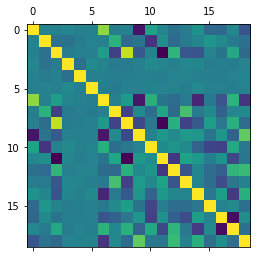

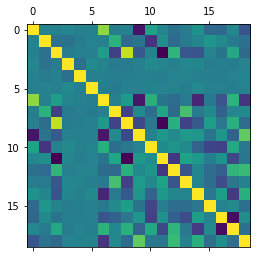

In [44]:
import matplotlib.pyplot as plt

plt.matshow(df28mean.corr())
plt.show()

## 2.3. Plotting (PCA)

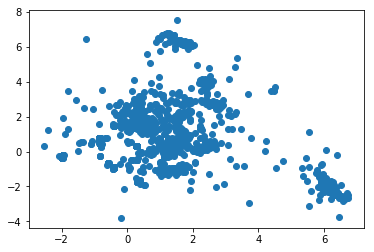

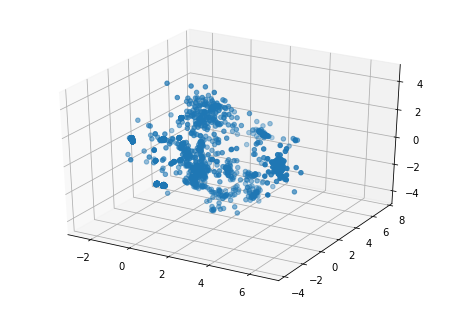

In [27]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

if (n_components >= 2): 
    x = X_pca[:,0]
    y = X_pca[:,1]
    plt.scatter(x,y)
    plt.show()
    
fig = plt.figure()
ax = Axes3D(fig)
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
ax.scatter(x,y,z)
plt.show()

# 3. Clustering

## 3.1. Using KMeans

In [39]:
from sklearn.cluster import KMeans
from sklearn import metrics

iterations = 10
max_iter = 300 
tol = 1e-04 
random_state = 0
k = 59
init = "random"
km = KMeans(k, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
labels = km.fit_predict(df28mean)


print(metrics.silhouette_score(df28mean, labels))

0.470659353378647


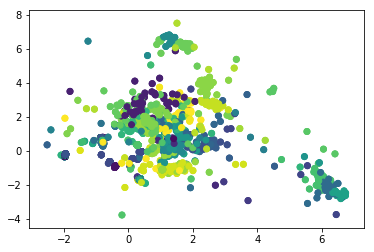

In [46]:
x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y, c = labels)
plt.show()

## 3.2. Plotting centroids

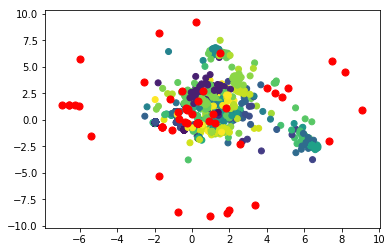

In [41]:
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red',s=50)
plt.show()

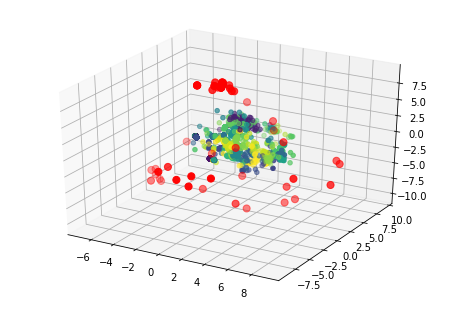

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], c='red',s=50)
ax.scatter(x,y,z, c = labels)
plt.show()